In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from tqdm import tqdm

In [2]:
save_plot = False

currentNotebook = 'sample_angles'

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [3]:
rnd_state = np.random.RandomState(43)

In [4]:
colors = cm.Set1(np.linspace(0, 1, 9))

# Epair

In [6]:
def get_new_psi_pairprod_exp(E, E_, rnd_state):
    n = -1
    a = 8.9e-4
    b = 1.5e-5
    c = 0.032
    d = 1
    e = 0.1
    m = 105.7 / 1e3 # in GeV
    m_e =   0.5110 / 1e3 # in GeV
    nu = (E - E_) / (E - m)
    minimum = np.min([a * nu**(1/4) * (1 + b*E) + c * nu / (nu + d), e])
    rms_theta = (2.3 + np.log(E)) * (1- nu)**n / E * (nu - 2 * m_e/E)**2 / nu**2 * minimum
    theta = rnd_state.exponential(rms_theta**2)
    return np.sqrt(theta), rms_theta

theta = get_new_psi_pairprod_exp(1e3, 6e1, rnd_state)
print(theta)

(0.0008811176809497183, 0.0025202653385447025)


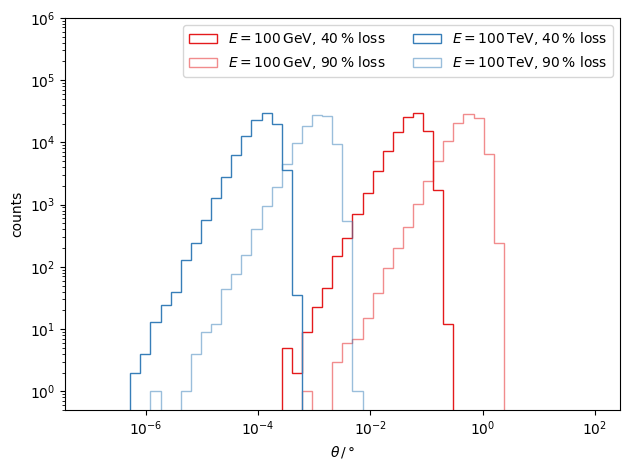

In [8]:
n_events = 100000
bins = np.logspace(-7, 2, 51)
E = 1e2 # in GeV
E_ = 6e1 # in GeV
psi_04 = [get_new_psi_pairprod_exp(E, E_, rnd_state)[0] for i in range(n_events)]

E = 1e2
E_ = 1e1
psi_09 = [get_new_psi_pairprod_exp(E, E_, rnd_state)[0] for i in range(n_events)]
plt.hist(np.rad2deg(psi_04), color=colors[0], histtype='step', bins=bins, label=r'$E = 100\,\mathrm{GeV}$, $40\,\%$ loss')
plt.hist(np.rad2deg(psi_09), color=colors[0], alpha=0.5, histtype='step', bins=bins, label=r'$E = 100\,\mathrm{GeV}$, $90\,\%$ loss')



E = 1e5
E_ = 6e4
psi_04 = [get_new_psi_pairprod_exp(E, E_, rnd_state)[0] for i in range(n_events)]
E = 1e5
E_ = 1e4
psi_09 = [get_new_psi_pairprod_exp(E, E_, rnd_state)[0] for i in range(n_events)]
plt.hist(np.rad2deg(psi_04), color=colors[1], histtype='step', bins=bins, label=r'$E = 100\,\mathrm{TeV}$, $40\,\%$ loss')
plt.hist(np.rad2deg(psi_09), color=colors[1], alpha=0.5, histtype='step', bins=bins, label=r'$E = 100\,\mathrm{TeV}$, $90\,\%$ loss')


plt.yscale('log')
plt.xscale('log')
plt.ylabel('counts')
plt.xlabel(r'$\theta\,/\,°$')
plt.ylim(5e-1, 1e6)
plt.legend(ncol=2)
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'epair_100GeV_100TeV.pdf')

# DeltaE

In [9]:
def get_new_psi_deltaE_NEW(E_mu, E_mu_prime, m_mu = 105.6583755, m_e = 0.51099895, is_degree=True):
    assert E_mu > m_mu, 'incoming energy lower than muon mass'
    
    gamma = E_mu / m_mu
    epsilon_max = 2 * m_e * (gamma**2 - 1) / (1 + 2*gamma*m_e/m_mu + (m_e/m_mu)**2) 
    assert E_mu_prime > E_mu - epsilon_max
    
    p_mu = np.sqrt((E_mu + m_mu) * (E_mu - m_mu))
    p_mu_prime = np.sqrt((E_mu_prime + m_mu) * (E_mu_prime - m_mu))
    
    cos_theta = ((E_mu + m_e) * E_mu_prime - E_mu*m_e - m_mu**2) / (p_mu * p_mu_prime)
    theta_mu = np.arccos(cos_theta)
    if is_degree:
        return np.rad2deg(theta_mu)
    else:
        return theta_mu

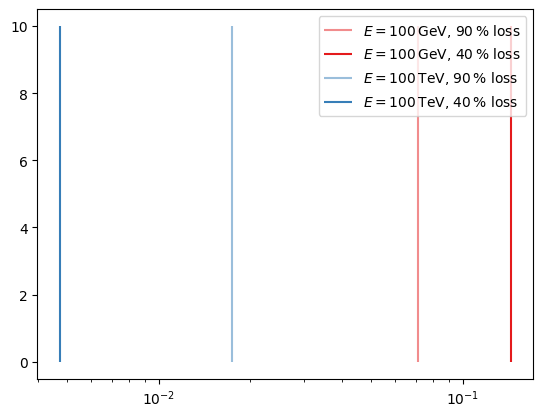

In [10]:
theta = get_new_psi_deltaE_NEW(1e2*1e3, 1e1*1e3)
plt.vlines(theta, 0, 10, color=colors[0], alpha=0.5, label=r'$E = 100\,\mathrm{GeV}$, $90\,\%$ loss')

theta = get_new_psi_deltaE_NEW(1e2*1e3, 6e1*1e3)
plt.vlines(theta, 0, 10, color=colors[0], label=r'$E = 100\,\mathrm{GeV}$, $40\,\%$ loss')

theta = get_new_psi_deltaE_NEW(1e5*1e3, 1e4*1e3)
plt.vlines(theta, 0, 10, color=colors[1], alpha=0.5, label=r'$E = 100\,\mathrm{TeV}$, $90\,\%$ loss')

theta = get_new_psi_deltaE_NEW(1e5*1e3, 6e4*1e3)
plt.vlines(theta, 0, 10, color=colors[1], label=r'$E = 100\,\mathrm{TeV}$, $40\,\%$ loss')


plt.xscale('log')
plt.legend()
if save_plot:
    plt.savefig(plot_dir + 'ioniz_100GeV_100TeV.pdf')

# photonuclear Ginneken and Geant4

In [11]:
def get_new_psi_nuclint_ginneken(E, E_, rnd_state, m=0.1057, is_degree=True):
    nu = (E - E_) / (E - m)
    rms_theta = (0.39 / (E * (1 - nu))) * (np.sqrt(E) * nu * (1 - nu))**0.17 * (1 - 0.135/(E * nu))
    theta_mu = np.sqrt(rnd_state.exponential(rms_theta**2))
    if is_degree:
        return np.rad2deg(theta_mu)
    else: return theta_mu  

def get_new_psi_nuclint(E, E_, rnd_state, is_degree=True, nu_min=None, nu_max=True):
    M = 0.9383 # Proton mass
    mu = 0.1057 # Muon mass
    if nu_min is not None:
        if E - E_ < nu_min:
            print('minimum energy transfer is 0.2 GeV')
            return 0
    if nu_max:
        nu_max = E - M / 2
        if E - E_ > nu_max:
            print('maximum energy transfer is (E - mass_nucleon/2)={}, but here: ', E - E_)
            return 0
    m_0=np.sqrt(0.4)
    p = rnd_state.uniform(0, 1)
    # nu = epsilon
    epsilon = E - E_
    y = epsilon / E
    t_max = 2 * M * epsilon
    t_min = (mu * y)**2 / (1 - y)
    t_1 = np.minimum(epsilon**2, m_0**2)
    t_p = (t_max * t_1) / ((t_max + t_1) * ((t_max * (t_min + t_1))\
                    / (t_min * (t_max + t_1)))**p - t_max)
    sin2 = (t_p - t_min) / (4 * (E * E_ - mu**2) - 2 * t_min)
    theta_mu = 2 * np.arcsin(np.sqrt(sin2))
    
    if is_degree:
        return np.rad2deg(theta_mu)
    else:
        return theta_mu

100%|██████████| 100000/100000 [00:00<00:00, 456355.99it/s]


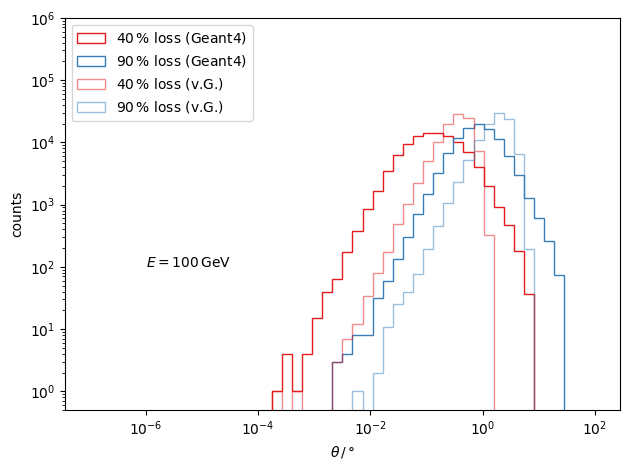

In [13]:
n_events = 100000
bins = np.logspace(-7, 2, 51)



E = 1e2 # 100 GeV
loss = 0.4
E_ = (1-loss) * E
angles_04 = [get_new_psi_nuclint(E, E_, rnd_state) for i in tqdm(range(n_events))]

loss = 0.9
E_ = (1-loss) * E
angles_09 = [get_new_psi_nuclint(E, E_, rnd_state) for i in tqdm(range(n_events))]


plt.hist(angles_04, bins=bins, color=colors[0], histtype='step', label=r'$40\,\%$ loss (Geant4)')
plt.hist(angles_09, bins=bins, color=colors[1], histtype='step', label=r'$90\,\%$ loss (Geant4)')




E = 1e2 # 100 GeV
loss = 0.4
E_ = (1-loss) * E
angles_04 = [get_new_psi_nuclint_ginneken(E, E_, rnd_state) for i in tqdm(range(n_events))]

loss = 0.9
E_ = (1-loss) * E
angles_09 = [get_new_psi_nuclint_ginneken(E, E_, rnd_state) for i in tqdm(range(n_events))]




plt.hist(angles_04, bins=bins, color=colors[0], alpha=0.5, histtype='step', label=r'$40\,\%$ loss (v.G.)')
plt.hist(angles_09, bins=bins, color=colors[1], alpha=0.5, histtype='step', label=r'$90\,\%$ loss (v.G.)')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.ylabel('counts')
plt.text(1e-6, 1e2, r'$E = 100\,$GeV')
# plt.xlim(1e-7, 1e2)
plt.ylim(5e-1, 1e6)
# plt.legend(bbox_to_anchor=(0.2, 1.4), ncol=2)
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'photonuclear_G4_Ginneken_100GeV.pdf')

100%|██████████| 100000/100000 [00:00<00:00, 487232.17it/s]


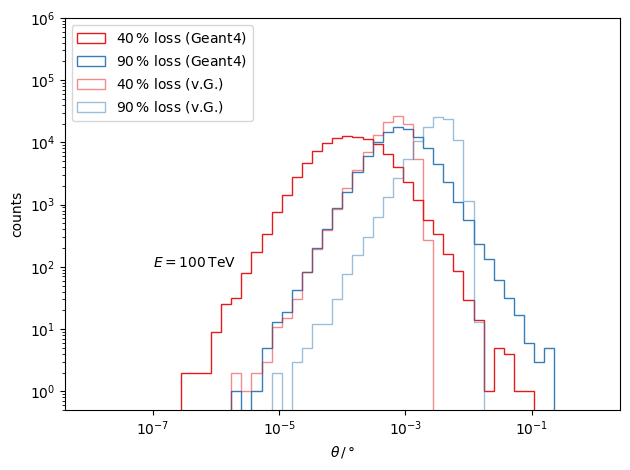

In [17]:
n_events = 100000
bins = np.logspace(-8, 0, 51)



E = 1e5 # 100 TeV
loss = 0.4
E_ = (1-loss) * E
angles_04 = [get_new_psi_nuclint(E, E_, rnd_state) for i in tqdm(range(n_events))]

loss = 0.9
E_ = (1-loss) * E
angles_09 = [get_new_psi_nuclint(E, E_, rnd_state) for i in tqdm(range(n_events))]


plt.hist(angles_04, bins=bins, color=colors[0], histtype='step', label=r'$40\,\%$ loss (Geant4)')
plt.hist(angles_09, bins=bins, color=colors[1], histtype='step', label=r'$90\,\%$ loss (Geant4)')




E = 1e5 # 100 TeV
loss = 0.4
E_ = (1-loss) * E
angles_04 = [get_new_psi_nuclint_ginneken(E, E_, rnd_state) for i in tqdm(range(n_events))]

loss = 0.9
E_ = (1-loss) * E
angles_09 = [get_new_psi_nuclint_ginneken(E, E_, rnd_state) for i in tqdm(range(n_events))]




plt.hist(angles_04, bins=bins, color=colors[0], alpha=0.5, histtype='step', label=r'$40\,\%$ loss (v.G.)')
plt.hist(angles_09, bins=bins, color=colors[1], alpha=0.5, histtype='step', label=r'$90\,\%$ loss (v.G.)')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.ylabel('counts')
plt.text(1e-7, 1e2, r'$E = 100\,$TeV')
# plt.xlim(1e-7, 1e2)
plt.ylim(5e-1, 1e6)
# plt.legend(bbox_to_anchor=(0.2, 1.4), ncol=2)
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'photonuclear_G4_Ginneken_100TeV.pdf')

# bremsstrahlung Ginneken and Geant4

In [18]:
def get_new_psi_brems_ginneken_theta(E, E_, Z, rnd_state, is_degree=True):
    rms_theta = get_new_psi_brems_ginneken_rms_theta(E, E_, Z)
    theta = np.sqrt(rnd_state.exponential(rms_theta**2))
    if is_degree:
        return np.rad2deg(theta)
    else:
        return theta
    
def get_new_psi_brems_ginneken_rms_theta(E, E_, Z, m=0.1057):    
    nu = (E - E_) / (E - m)
    if nu <= 0.5:
        k_1 = 0.092 * E**(-1/3)
        k_2 = 0.052 / E * Z**(-1/4)
        k_3 = 0.22 * E**(-0.92)
        rms_theta = np.max([np.min([k_1 * np.sqrt(nu), k_2]), k_3 * nu])
        return rms_theta
    if (nu > 0.5):
        k_4 = 0.26 * E**(-0.91)
        n = 0.81 * E**(0.5) / (E**(0.5) + 1.8)
        rms_theta = k_4 * nu**(1+n) * (1-nu)**(-n)
        if (rms_theta < 0.2):
            return rms_theta
    if (nu > 0.5):
        n = 0.81 * E**(0.5) / (E**(0.5) + 1.8)
        k_4 = 0.26 * E**(-0.91) 
        k_5 = k_4 * nu**(1+n) * (1-nu)**(0.5-n)
        rms_theta = k_5 * (1-nu)**(-0.5)
        if (rms_theta >= 0.2):
            return rms_theta
        
def get_new_psi_brems(E, E_, rnd_state, is_degree=True, theta_star=1):
    epsilon = E - E_
    mu = 0.1057  # muon mass
    p = rnd_state.uniform(0, 1)
    r_max = np.minimum(1, E_/epsilon) * E * theta_star / mu
    a = p * r_max**2 / (1+r_max**2)
    r = np.sqrt(a/(1-a))
    theta_photon = mu / E * r
    theta_mu = epsilon / E_ * theta_photon
    
    if is_degree:
        return np.rad2deg(theta_mu)
    else:
        return theta_mu

100%|██████████| 100000/100000 [00:00<00:00, 579800.25it/s]


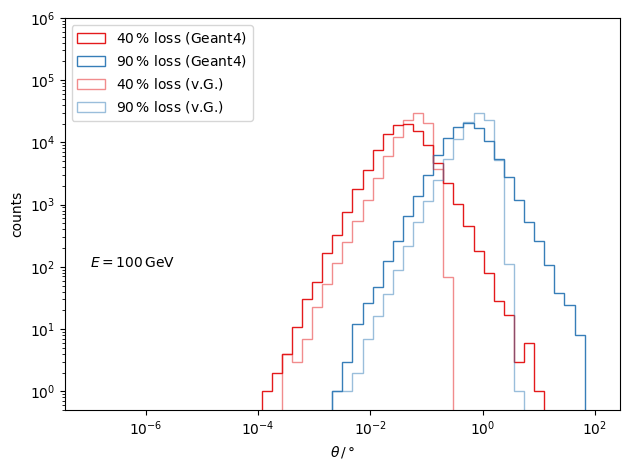

In [20]:
bins = np.logspace(-7, 2, 51)
n_events = 100000

E = 1e2 # 100 GeV
loss = 0.4
E_ = (1-loss) * E
angles_04 = [get_new_psi_brems(E, E_, rnd_state) for i in tqdm(range(n_events))]



loss = 0.9
E_ = (1-loss) * E
angles_09 = [get_new_psi_brems(E, E_, rnd_state) for i in tqdm(range(n_events))]



plt.hist(angles_04, bins=bins, color=colors[0], histtype='step', label=r'$40\,\%$ loss (Geant4)')
plt.hist(angles_09, bins=bins, color=colors[1], histtype='step', label=r'$90\,\%$ loss (Geant4)')



E = 1e2 # 100 GeV
loss = 0.4
E_ = (1-loss) * E
angles_04 = [get_new_psi_brems_ginneken_theta(E, E_, 1, rnd_state) for i in tqdm(range(n_events))]


loss = 0.9
E_ = (1-loss) * E
angles_09 = [get_new_psi_brems_ginneken_theta(E, E_, 1, rnd_state) for i in tqdm(range(n_events))]



plt.hist(angles_04, bins=bins, color=colors[0], alpha=0.5, histtype='step', label=r'$40\,\%$ loss (v.G.)')
plt.hist(angles_09, bins=bins, color=colors[1], alpha=0.5, histtype='step', label=r'$90\,\%$ loss (v.G.)')
plt.text(1e-7, 1e2, r'$E = 100\,\mathrm{GeV}$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.ylabel('counts')
plt.ylim(5e-1, 1e6)
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'brems_G4_Ginneken_100GeV.pdf')

100%|██████████| 100000/100000 [00:00<00:00, 579226.95it/s]


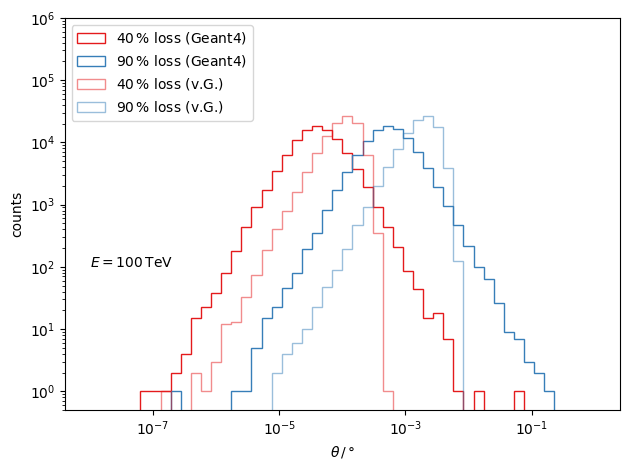

In [23]:
bins = np.logspace(-8, 0, 51)
n_events = 100000

E = 1e5 # 100 TeV
loss = 0.4
E_ = (1-loss) * E
angles_04 = [get_new_psi_brems(E, E_, rnd_state) for i in tqdm(range(n_events))]



loss = 0.9
E_ = (1-loss) * E
angles_09 = [get_new_psi_brems(E, E_, rnd_state) for i in tqdm(range(n_events))]



plt.hist(angles_04, bins=bins, color=colors[0], histtype='step', label=r'$40\,\%$ loss (Geant4)')
plt.hist(angles_09, bins=bins, color=colors[1], histtype='step', label=r'$90\,\%$ loss (Geant4)')



E = 1e5 # 100 TeV
loss = 0.4
E_ = (1-loss) * E
angles_04 = [get_new_psi_brems_ginneken_theta(E, E_, 1, rnd_state) for i in tqdm(range(n_events))]


loss = 0.9
E_ = (1-loss) * E
angles_09 = [get_new_psi_brems_ginneken_theta(E, E_, 1, rnd_state) for i in tqdm(range(n_events))]



plt.hist(angles_04, bins=bins, color=colors[0], alpha=0.5, histtype='step', label=r'$40\,\%$ loss (v.G.)')
plt.hist(angles_09, bins=bins, color=colors[1], alpha=0.5, histtype='step', label=r'$90\,\%$ loss (v.G.)')
plt.text(1e-8, 1e2, r'$E = 100\,\mathrm{TeV}$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.ylabel('counts')
plt.ylim(5e-1, 1e6)
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'brems_G4_Ginneken_100TeV.pdf')

# all deflections

100%|██████████| 100000/100000 [00:00<00:00, 151128.17it/s]


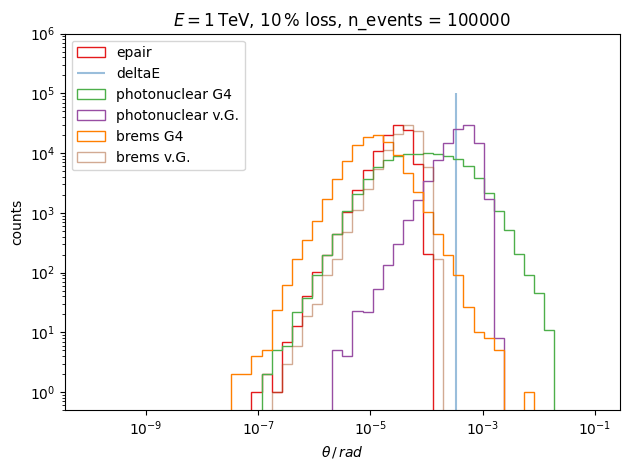

In [46]:
n_events = int(1e5)
bins = np.logspace(-10, -1, 51)
E = 1e3 # in GeV
E_ = 9e2 # in GeV

# epair
psi_04 = [get_new_psi_pairprod_exp(E, E_, rnd_state)[0] for i in range(n_events)]
plt.hist(psi_04, color=colors[0], histtype='step', bins=bins, label='epair')

# deltaE
theta = get_new_psi_deltaE_NEW(E*1e3, E_*1e3)
plt.vlines(np.deg2rad(theta), 0, 1e5, color=colors[1], alpha=0.5, label='deltaE')

# photonuclear Geant4
angles_04 = [get_new_psi_nuclint(E, E_, rnd_state) for i in tqdm(range(n_events))]
plt.hist(np.deg2rad(angles_04), bins=bins, color=colors[2], histtype='step', label='photonuclear G4')

# photonuclear Ginneken
angles_04 = [get_new_psi_nuclint_ginneken(E, E_, rnd_state) for i in tqdm(range(n_events))]
plt.hist(np.deg2rad(angles_04), bins=bins, color=colors[3], histtype='step', label='photonuclear v.G.')

# brems Geant4
angles_04 = [get_new_psi_brems(E, E_, rnd_state) for i in tqdm(range(n_events))]
plt.hist(np.deg2rad(angles_04), bins=bins, color=colors[4], histtype='step', label='brems G4')

angles_04 = [get_new_psi_brems_ginneken_theta(E, E_, 1, rnd_state) for i in tqdm(range(n_events))]
plt.hist(np.deg2rad(angles_04), bins=bins, color=colors[6], alpha=0.5, histtype='step', label='brems v.G.')

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta\,/\,rad$')
plt.ylabel('counts')
plt.ylim(5e-1, 1e6)
plt.legend(loc='upper left')
plt.title(r'$E = 1\,\mathrm{TeV}$, $10\,\%$ loss, n_events = '+ str(n_events))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'all_deflections_1TeV_10percentLoss_rad.pdf')


100%|██████████| 100000/100000 [00:00<00:00, 566990.15it/s]


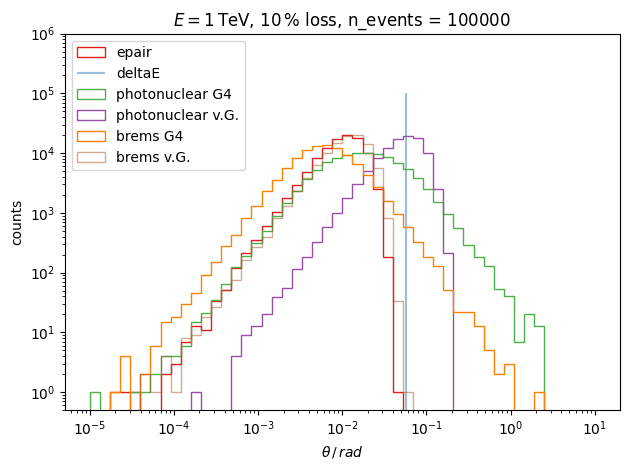

In [45]:
n_events = int(1e5)
bins = np.logspace(-5, 1, 51)
E = 1e3 # in GeV
E_ = 5e2 # in GeV

# epair
psi_04 = [get_new_psi_pairprod_exp(E, E_, rnd_state)[0] for i in range(n_events)]
plt.hist(np.rad2deg(psi_04), color=colors[0], histtype='step', bins=bins, label='epair')

# deltaE
theta = get_new_psi_deltaE_NEW(E*1e3, E_*1e3)
plt.vlines(theta, 0, 1e5, color=colors[1], alpha=0.5, label='deltaE')

# photonuclear Geant4
angles_04 = [get_new_psi_nuclint(E, E_, rnd_state) for i in tqdm(range(n_events))]
plt.hist(angles_04, bins=bins, color=colors[2], histtype='step', label='photonuclear G4')

# photonuclear Ginneken
angles_04 = [get_new_psi_nuclint_ginneken(E, E_, rnd_state) for i in tqdm(range(n_events))]
plt.hist(angles_04, bins=bins, color=colors[3], histtype='step', label='photonuclear v.G.')

# brems Geant4
angles_04 = [get_new_psi_brems(E, E_, rnd_state) for i in tqdm(range(n_events))]
plt.hist(angles_04, bins=bins, color=colors[4], histtype='step', label='brems G4')

angles_04 = [get_new_psi_brems_ginneken_theta(E, E_, 1, rnd_state) for i in tqdm(range(n_events))]
plt.hist(angles_04, bins=bins, color=colors[6], alpha=0.5, histtype='step', label='brems v.G.')

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta\,/\,rad$')
plt.ylabel('counts')
plt.ylim(5e-1, 1e6)
plt.legend(loc='upper left')
plt.title(r'$E = 1\,\mathrm{TeV}$, $10\,\%$ loss, n_events = '+ str(n_events))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'all_deflections_1TeV_50percentLoss_deg.pdf')
